In [1]:
import keras 
import datetime 
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import OneHotEncoder

from keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

%config IPCompleter.greedy=True

Using TensorFlow backend.


In [12]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

# Pre-processing

In [13]:
from keras import backend as k

k.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0',
 '/job:localhost/replica:0/task:0/device:GPU:1']

In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [15]:
# number of examples in a mini-batch
batch_size= 32

# number of classes in the dataset
num_classes= 10

#class_names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

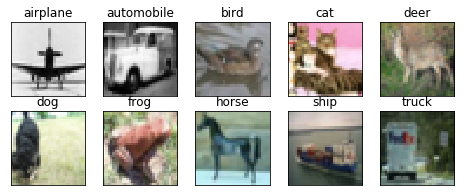

In [16]:
# print figure with 10 random images from each class
fig= plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax=fig.add_subplot(2,5,1+i,xticks=[],yticks=[])
    idx=np.where(y_train[:]==i)[0]
    features_idx=x_train[idx,::]
    img_num=np.random.randint(features_idx.shape[0])
    im=features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [17]:
new_x_train= x_train/255
new_x_test= x_test/255

x_trainvec= np.reshape(new_x_train,(50000,3072))
x_testvec= np.reshape(new_x_test,(10000,3072))

In [18]:

y_train_ohe=np.eye(num_classes)[y_train]
y_test_ohe=np.eye(num_classes)[y_test]

new_y_train_ohe = np.squeeze(y_train_ohe, axis=1)
new_y_test_ohe = np.squeeze(y_test_ohe, axis=1)
new_y_train_ohe.shape


(50000, 10)

# Feed-forward Neural Networks (FFNNs)

In [27]:
def plot_model_metrics(model_history):
    #plot loss
    fig1= plt.figure(1)
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('categorical cross-entropy loss')
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper right')
    
    #plot accuracy
    fig2= plt.figure(2)
    plt.plot(model_history.history['acc'])
    plt.plot(model_history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper right')
    
    plt.show()

SGD (1x1024,1x256,1x64)

In [17]:
model1= Sequential()

model1.add(Dense(3072, activation='relu',input_dim=3072))
model1.add(Dropout(0.5))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10,activation='softmax'))

initial_time1= datetime.datetime.now()

model1.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

model1.fit(x_trainvec,new_y_train_ohe, epochs=20,batch_size=32)

score1=model1.evaluate(x_testvec,new_y_test_ohe,batch_size=32)

finishing_time1= datetime.datetime.now()

training_time1= finishing_time1-initial_time1

print('Training:',training_time1)
print('Score:', score1)

Epoch 1/20
50000/50000 [==============================] - 13s 261us/step - loss: 2.0564 - acc: 0.2428
Epoch 2/20
50000/50000 [==============================] - 11s 218us/step - loss: 1.8776 - acc: 0.3202
Epoch 3/20
50000/50000 [==============================] - 11s 218us/step - loss: 1.8107 - acc: 0.3489
Epoch 4/20
50000/50000 [==============================] - 11s 218us/step - loss: 1.7608 - acc: 0.3692
Epoch 5/20
50000/50000 [==============================] - 11s 218us/step - loss: 1.7237 - acc: 0.3832
Epoch 6/20
50000/50000 [==============================] - 11s 219us/step - loss: 1.6970 - acc: 0.3919
Epoch 7/20
50000/50000 [==============================] - 11s 220us/step - loss: 1.6666 - acc: 0.4039
Epoch 8/20
50000/50000 [==============================] - 11s 220us/step - loss: 1.6450 - acc: 0.4143
Epoch 9/20
50000/50000 [==============================] - 11s 219us/step - loss: 1.6215 - acc: 0.4203
Epoch 10/20
50000/50000 [==============================] - 11s 219us/step - loss: 

In [18]:
model2= Sequential()

model2.add(Dense(3072, activation='relu',input_dim=3072))
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation='softmax'))


initial_time2= datetime.datetime.now()

model2.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

model2.fit(x_trainvec,new_y_train_ohe, epochs=20,batch_size=32)

datetime.datetime.now()

score2=model2.evaluate(x_testvec,new_y_test_ohe,batch_size=32)

finishing_time2= datetime.datetime.now()

training_time2= finishing_time2-initial_time2

print('Training:',training_time2)
print('Score:', score2)

Epoch 1/20
50000/50000 [==============================] - 16s 312us/step - loss: 2.3812 - acc: 0.1436
Epoch 2/20
50000/50000 [==============================] - 15s 304us/step - loss: 2.0407 - acc: 0.2365
Epoch 3/20
50000/50000 [==============================] - 15s 307us/step - loss: 1.9941 - acc: 0.2598
Epoch 4/20
50000/50000 [==============================] - 15s 304us/step - loss: 1.9755 - acc: 0.2722
Epoch 5/20
50000/50000 [==============================] - 15s 306us/step - loss: 1.9708 - acc: 0.2771
Epoch 6/20
50000/50000 [==============================] - 15s 305us/step - loss: 1.9564 - acc: 0.2803
Epoch 7/20
50000/50000 [==============================] - 15s 305us/step - loss: 1.9463 - acc: 0.2873
Epoch 8/20
50000/50000 [==============================] - 15s 307us/step - loss: 1.9384 - acc: 0.2895
Epoch 9/20
50000/50000 [==============================] - 15s 305us/step - loss: 1.9355 - acc: 0.2919
Epoch 10/20
50000/50000 [==============================] - 15s 305us/step - loss: 

In [19]:
model3= Sequential()

model3.add(Dense(3072, activation='relu',input_dim=3072))
model3.add(Dropout(0.5))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10,activation='softmax'))

initial_time3= datetime.datetime.now()

model3.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model3.fit(x_trainvec,new_y_train_ohe, epochs=20,batch_size=32)

score3=model3.evaluate(x_testvec,new_y_test_ohe,batch_size=32)

finishing_time3= datetime.datetime.now()

training_time3= finishing_time3-initial_time3

print('Training:',training_time3)
print('Score:', score3)

Epoch 1/20
50000/50000 [==============================] - 18s 366us/step - loss: 2.2537 - acc: 0.1344
Epoch 2/20
50000/50000 [==============================] - 18s 355us/step - loss: 2.0636 - acc: 0.2131
Epoch 3/20
50000/50000 [==============================] - 18s 355us/step - loss: 1.9952 - acc: 0.2481
Epoch 4/20
50000/50000 [==============================] - 18s 356us/step - loss: 1.9654 - acc: 0.2571
Epoch 5/20
50000/50000 [==============================] - 18s 356us/step - loss: 1.9548 - acc: 0.2677
Epoch 6/20
50000/50000 [==============================] - 18s 355us/step - loss: 1.9373 - acc: 0.2762
Epoch 7/20
50000/50000 [==============================] - 18s 356us/step - loss: 1.9204 - acc: 0.2851
Epoch 8/20
50000/50000 [==============================] - 18s 358us/step - loss: 1.9124 - acc: 0.2873
Epoch 9/20
50000/50000 [==============================] - 18s 351us/step - loss: 1.9021 - acc: 0.2921
Epoch 10/20
50000/50000 [==============================] - 18s 353us/step - loss: 

In [20]:
model4= Sequential()
model4.add(Dense(3072, activation='relu',input_dim=3072))
#model4.add(Dropout(0.5))
model4.add(Dense(1024, activation='relu'))
#model4.add(Dropout(0.4))
model4.add(Dense(1024, activation='relu'))
model4.add(Dropout(0.4))
model4.add(Dense(1024, activation='relu'))
model4.add(Dropout(0.4))
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(10,activation='softmax'))

initial_time4= datetime.datetime.now()

model4.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

model4.fit(x_trainvec,new_y_train_ohe, epochs=20,batch_size=64)

score4=model4.evaluate(x_testvec,new_y_test_ohe,batch_size=64)

finishing_time4= datetime.datetime.now()

training_time4= finishing_time4-initial_time4

print('Training:',training_time4)
print('Score:', score4)

Epoch 1/20
50000/50000 [==============================] - 9s 190us/step - loss: 2.3052 - acc: 0.1041
Epoch 2/20
50000/50000 [==============================] - 9s 177us/step - loss: 2.2933 - acc: 0.1205
Epoch 3/20
50000/50000 [==============================] - 9s 178us/step - loss: 2.2406 - acc: 0.1485
Epoch 4/20
50000/50000 [==============================] - 9s 176us/step - loss: 2.1652 - acc: 0.1735
Epoch 5/20
50000/50000 [==============================] - 9s 177us/step - loss: 2.1288 - acc: 0.1767
Epoch 6/20
50000/50000 [==============================] - 9s 178us/step - loss: 2.1011 - acc: 0.1799
Epoch 7/20
50000/50000 [==============================] - 9s 179us/step - loss: 2.0759 - acc: 0.1854
Epoch 8/20
50000/50000 [==============================] - 9s 178us/step - loss: 2.0590 - acc: 0.1864
Epoch 9/20
50000/50000 [==============================] - 9s 178us/step - loss: 2.0436 - acc: 0.1869
Epoch 10/20
50000/50000 [==============================] - 9s 178us/step - loss: 2.0272 - a

In [23]:
model5= Sequential()
model5.add(Dense(3072, activation='relu',input_dim=3072))
model5.add(Dropout(0.5))
model5.add(Dense(1024, activation='relu'))
model5.add(Dropout(0.4))
model5.add(Dense(1024, activation='relu'))
model5.add(Dropout(0.4))
model5.add(Dense(1024, activation='relu'))
model5.add(Dropout(0.4))
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(64,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(64,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(64,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(10,activation='softmax'))

initial_time5= datetime.datetime.now()

model5.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model5.fit(x_trainvec,new_y_train_ohe, epochs=20,batch_size=64)

score5=model5.evaluate(x_testvec,new_y_test_ohe,batch_size=64)

finishing_time5= datetime.datetime.now()

training_time5= finishing_time5-initial_time5

print('Training:',training_time5)
print('Score:', score5)

Epoch 1/20
50000/50000 [==============================] - 16s 316us/step - loss: 2.2481 - acc: 0.1409
Epoch 2/20
50000/50000 [==============================] - 15s 293us/step - loss: 2.1341 - acc: 0.1693
Epoch 3/20
50000/50000 [==============================] - 15s 292us/step - loss: 2.1021 - acc: 0.1803
Epoch 4/20
50000/50000 [==============================] - 15s 293us/step - loss: 2.0905 - acc: 0.1826
Epoch 5/20
50000/50000 [==============================] - 14s 290us/step - loss: 2.0865 - acc: 0.1831
Epoch 6/20
50000/50000 [==============================] - 15s 291us/step - loss: 2.0773 - acc: 0.1833
Epoch 7/20
50000/50000 [==============================] - 15s 291us/step - loss: 2.0702 - acc: 0.1859
Epoch 8/20
50000/50000 [==============================] - 15s 292us/step - loss: 2.0669 - acc: 0.1847
Epoch 9/20
50000/50000 [==============================] - 15s 291us/step - loss: 2.0580 - acc: 0.1904
Epoch 10/20
50000/50000 [==============================] - 15s 292us/step - loss: 

In [24]:
model6= Sequential()
model6.add(Dense(3072, activation='relu',input_dim=3072))
model6.add(Dropout(0.5))
model6.add(Dense(1024, activation='relu'))
model6.add(Dropout(0.4))
model6.add(Dense(1024, activation='relu'))
model6.add(Dropout(0.4))
model6.add(Dense(1024, activation='relu'))
model6.add(Dropout(0.4))
model6.add(Dense(256, activation='relu'))
model6.add(Dropout(0.3))
model6.add(Dense(64,activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(10,activation='softmax'))

initial_time5= datetime.datetime.now()

model6.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model6.fit(x_trainvec,new_y_train_ohe, epochs=20,batch_size=64)

score6=model6.evaluate(x_testvec,new_y_test_ohe,batch_size=64)

finishing_time6= datetime.datetime.now()

training_time6= finishing_time5-initial_time5

print('Training:',training_time6)
print('Score:', score6)

Epoch 1/20
50000/50000 [==============================] - 14s 276us/step - loss: 2.3215 - acc: 0.0984
Epoch 2/20
50000/50000 [==============================] - 13s 254us/step - loss: 2.3032 - acc: 0.0987
Epoch 3/20
50000/50000 [==============================] - 13s 255us/step - loss: 2.3028 - acc: 0.0990
Epoch 4/20
50000/50000 [==============================] - 13s 256us/step - loss: 2.3030 - acc: 0.0953
Epoch 5/20
50000/50000 [==============================] - 13s 255us/step - loss: 2.3028 - acc: 0.0995
Epoch 6/20
50000/50000 [==============================] - 13s 256us/step - loss: 2.3027 - acc: 0.0963
Epoch 7/20
50000/50000 [==============================] - 13s 255us/step - loss: 2.3028 - acc: 0.0983
Epoch 8/20
50000/50000 [==============================] - 13s 256us/step - loss: 2.3029 - acc: 0.0981
Epoch 9/20
50000/50000 [==============================] - 13s 256us/step - loss: 2.3027 - acc: 0.0994
Epoch 10/20
50000/50000 [==============================] - 13s 257us/step - loss: 

In [26]:
model7= Sequential()
model7.add(Dense(3072, activation='relu',input_dim=3072))
model7.add(Dropout(0.5))
model7.add(Dense(1024, activation='relu'))
model7.add(Dropout(0.4))
model7.add(Dense(1024, activation='relu'))
model7.add(Dropout(0.4))
model7.add(Dense(1024, activation='relu'))
model7.add(Dropout(0.4))
model7.add(Dense(256, activation='relu'))
model7.add(Dropout(0.3))
model7.add(Dense(256, activation='relu'))
model7.add(Dropout(0.3))
model7.add(Dense(256, activation='relu'))
model7.add(Dropout(0.3))
model7.add(Dense(64,activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(64,activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(64,activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(10,activation='softmax'))

initial_time7= datetime.datetime.now()

model7.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model7.fit(x_trainvec,new_y_train_ohe, epochs=60,batch_size=64)

score7=model7.evaluate(x_testvec,new_y_test_ohe,batch_size=64)

finishing_time7= datetime.datetime.now()

training_time7= finishing_time7-initial_time7

print('Training:',training_time7)
print('Score:', score7)

Epoch 1/60
50000/50000 [==============================] - 16s 323us/step - loss: 2.2326 - acc: 0.1446
Epoch 2/60
50000/50000 [==============================] - 15s 293us/step - loss: 2.1294 - acc: 0.1705
Epoch 3/60
50000/50000 [==============================] - 15s 290us/step - loss: 2.1107 - acc: 0.1729
Epoch 4/60
50000/50000 [==============================] - 15s 293us/step - loss: 2.0941 - acc: 0.1804
Epoch 5/60
50000/50000 [==============================] - 15s 293us/step - loss: 2.0924 - acc: 0.1816
Epoch 6/60
50000/50000 [==============================] - 15s 292us/step - loss: 2.0819 - acc: 0.1812
Epoch 7/60
50000/50000 [==============================] - 15s 291us/step - loss: 2.1142 - acc: 0.1757
Epoch 8/60
50000/50000 [==============================] - 15s 294us/step - loss: 2.0760 - acc: 0.1842
Epoch 9/60
50000/50000 [==============================] - 15s 293us/step - loss: 2.0737 - acc: 0.1868
Epoch 10/60
50000/50000 [==============================] - 15s 294us/step - loss: 

In [35]:
model8= Sequential()

model8.add(Dense(3072, activation='relu',input_dim=3072))
model8.add(Dropout(0.5))
model8.add(Dense(1024, activation='relu'))
model8.add(Dropout(0.4))
model8.add(Dense(256, activation='relu'))
model8.add(Dropout(0.3))
model8.add(Dense(64,activation='relu'))
model8.add(Dropout(0.2))
model8.add(Dense(10,activation='softmax'))

initial_time8= datetime.datetime.now()

model8.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

model8.fit(x_trainvec,new_y_train_ohe, epochs=60,batch_size=32)

score8=model8.evaluate(x_testvec,new_y_test_ohe,batch_size=32)

finishing_time8= datetime.datetime.now()

training_time8= finishing_time8-initial_time8

print('Training:',training_time8)
print('Score:', score8)

Epoch 1/60
50000/50000 [==============================] - 15s 301us/step - loss: 2.1270 - acc: 0.2050
Epoch 2/60
50000/50000 [==============================] - 14s 271us/step - loss: 1.9398 - acc: 0.2864
Epoch 3/60
50000/50000 [==============================] - 13s 269us/step - loss: 1.8702 - acc: 0.3186
Epoch 4/60
50000/50000 [==============================] - 14s 271us/step - loss: 1.8189 - acc: 0.3424
Epoch 5/60
50000/50000 [==============================] - 13s 270us/step - loss: 1.7823 - acc: 0.3561
Epoch 6/60
50000/50000 [==============================] - 13s 267us/step - loss: 1.7484 - acc: 0.3690
Epoch 7/60
50000/50000 [==============================] - 14s 270us/step - loss: 1.7262 - acc: 0.3796
Epoch 8/60
50000/50000 [==============================] - 13s 269us/step - loss: 1.6986 - acc: 0.3894
Epoch 9/60
50000/50000 [==============================] - 14s 271us/step - loss: 1.6795 - acc: 0.3979
Epoch 10/60
50000/50000 [==============================] - 14s 271us/step - loss: 

# Convolutional Neural Networks (CNNs)

In [36]:
sgd=optimizers.SGD(lr=0.1,decay=0.0, momentum=0.0, nesterov=False) 

model9= Sequential()

model9.add(Dense(3072, activation='relu',input_dim=3072))
model9.add(Dropout(0.5))
model9.add(Dense(1024, activation='relu'))
model9.add(Dropout(0.4))
model9.add(Dense(256, activation='relu'))
model9.add(Dropout(0.3))
model9.add(Dense(64,activation='relu'))
model9.add(Dropout(0.2))
model9.add(Dense(10,activation='softmax'))

initial_time9= datetime.datetime.now()

model9.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

model9.fit(x_trainvec,new_y_train_ohe, epochs=60,batch_size=32)

score9=model9.evaluate(x_testvec,new_y_test_ohe,batch_size=32)

finishing_time9= datetime.datetime.now()

training_time9= finishing_time9-initial_time9

print('Training:',training_time9)
print('Score:', score9)

Epoch 1/60
50000/50000 [==============================] - 15s 300us/step - loss: 2.1523 - acc: 0.1749
Epoch 2/60
50000/50000 [==============================] - 13s 269us/step - loss: 1.9868 - acc: 0.2563
Epoch 3/60
50000/50000 [==============================] - 13s 270us/step - loss: 1.9279 - acc: 0.2913
Epoch 4/60
50000/50000 [==============================] - 13s 268us/step - loss: 1.8925 - acc: 0.3079
Epoch 5/60
50000/50000 [==============================] - 13s 267us/step - loss: 1.8551 - acc: 0.3271
Epoch 6/60
50000/50000 [==============================] - 13s 268us/step - loss: 1.8242 - acc: 0.3396
Epoch 7/60
50000/50000 [==============================] - 13s 268us/step - loss: 1.8020 - acc: 0.3507
Epoch 8/60
50000/50000 [==============================] - 13s 269us/step - loss: 1.7801 - acc: 0.3583
Epoch 9/60
50000/50000 [==============================] - 13s 268us/step - loss: 1.7643 - acc: 0.3653
Epoch 10/60
50000/50000 [==============================] - 13s 269us/step - loss: 

In [37]:
model10= Sequential()

model10.add(Dense(3072, activation='relu',input_dim=3072))
#model9.add(Dropout(0.5))
model10.add(Dense(1024, activation='relu'))
#model9.add(Dropout(0.4))
model10.add(Dense(256, activation='relu'))
#model9.add(Dropout(0.3))
model10.add(Dense(64,activation='relu'))
#model9.add(Dropout(0.2))
model10.add(Dense(10,activation='softmax'))

initial_time10= datetime.datetime.now()

model10.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

model10.fit(x_trainvec,new_y_train_ohe, epochs=60,batch_size=32)

score10=model10.evaluate(x_testvec,new_y_test_ohe,batch_size=32)

finishing_time10= datetime.datetime.now()

training_time10= finishing_time10-initial_time10

print('Training:',training_time10)
print('Score:', score10)

Epoch 1/60
50000/50000 [==============================] - 14s 283us/step - loss: 1.9107 - acc: 0.3024
Epoch 2/60
50000/50000 [==============================] - 12s 245us/step - loss: 1.7060 - acc: 0.3865
Epoch 3/60
50000/50000 [==============================] - 12s 246us/step - loss: 1.6171 - acc: 0.4199
Epoch 4/60
50000/50000 [==============================] - 12s 244us/step - loss: 1.5448 - acc: 0.4460
Epoch 5/60
50000/50000 [==============================] - 12s 245us/step - loss: 1.4898 - acc: 0.4677
Epoch 6/60
50000/50000 [==============================] - 12s 245us/step - loss: 1.4436 - acc: 0.4826
Epoch 7/60
50000/50000 [==============================] - 12s 247us/step - loss: 1.3994 - acc: 0.4963
Epoch 8/60
50000/50000 [==============================] - 12s 247us/step - loss: 1.3591 - acc: 0.5127
Epoch 9/60
50000/50000 [==============================] - 12s 247us/step - loss: 1.3168 - acc: 0.5309
Epoch 10/60
50000/50000 [==============================] - 12s 247us/step - loss: 

In [38]:
model11= Sequential()

model11.add(Dense(3072, activation='relu',input_dim=3072))
model11.add(Dropout(0.3))
model11.add(Dense(1024, activation='relu'))
model11.add(Dropout(0.2))
model11.add(Dense(256, activation='relu'))
model11.add(Dropout(0.1))
model11.add(Dense(64,activation='relu'))
#model9.add(Dropout(0.2))
model11.add(Dense(10,activation='softmax'))

initial_time11= datetime.datetime.now()

model11.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

model11.fit(x_trainvec,new_y_train_ohe, epochs=120,batch_size=32)

score11=model11.evaluate(x_testvec,new_y_test_ohe,batch_size=32)

finishing_time11= datetime.datetime.now()

training_time11= finishing_time1-initial_time11

print('Training:',training_time11)
print('Score:', score11)

Epoch 1/120
50000/50000 [==============================] - 15s 299us/step - loss: 1.9846 - acc: 0.2698
Epoch 2/120
50000/50000 [==============================] - 13s 264us/step - loss: 1.8112 - acc: 0.3426
Epoch 3/120
50000/50000 [==============================] - 13s 265us/step - loss: 1.7324 - acc: 0.3765
Epoch 4/120
50000/50000 [==============================] - 13s 264us/step - loss: 1.6825 - acc: 0.3966
Epoch 5/120
50000/50000 [==============================] - 13s 267us/step - loss: 1.6453 - acc: 0.4071
Epoch 6/120
50000/50000 [==============================] - 13s 266us/step - loss: 1.6132 - acc: 0.4231
Epoch 7/120
50000/50000 [==============================] - 13s 265us/step - loss: 1.5859 - acc: 0.4300
Epoch 8/120
50000/50000 [==============================] - 13s 266us/step - loss: 1.5588 - acc: 0.4390
Epoch 9/120
50000/50000 [==============================] - 13s 267us/step - loss: 1.5386 - acc: 0.4467
Epoch 10/120
50000/50000 [==============================] - 13s 266us/ste

In [39]:
model12= Sequential()

model12= Sequential()
model12.add(Dense(3072, activation='relu',input_dim=3072))
model12.add(Dropout(0.3))
model12.add(Dense(1024, activation='relu'))
model12.add(Dropout(0.2))
model12.add(Dense(1024, activation='relu'))
model12.add(Dropout(0.2))
model12.add(Dense(1024, activation='relu'))
model12.add(Dropout(0.2))
model12.add(Dense(256, activation='relu'))
model12.add(Dropout(0.3))
model12.add(Dense(64,activation='relu'))
model12.add(Dropout(0.1))
model12.add(Dense(64,activation='relu'))
model12.add(Dense(10,activation='softmax'))

initial_time12= datetime.datetime.now()

model12.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model12.fit(x_trainvec,new_y_train_ohe, epochs=300,batch_size=64)

score12=model12.evaluate(x_testvec,new_y_test_ohe,batch_size=64)

finishing_time12= datetime.datetime.now()

training_time12= finishing_time12-initial_time12

print('Training:',training_time12)
print('Score:', score12)

Epoch 1/300
50000/50000 [==============================] - 15s 310us/step - loss: 2.1662 - acc: 0.1552
Epoch 2/300
50000/50000 [==============================] - 13s 267us/step - loss: 2.0440 - acc: 0.2015
Epoch 3/300
50000/50000 [==============================] - 13s 267us/step - loss: 1.9685 - acc: 0.2495
Epoch 4/300
50000/50000 [==============================] - 13s 268us/step - loss: 1.9180 - acc: 0.2728
Epoch 5/300
50000/50000 [==============================] - 13s 266us/step - loss: 1.8962 - acc: 0.2873
Epoch 6/300
50000/50000 [==============================] - 13s 268us/step - loss: 1.8769 - acc: 0.2974
Epoch 7/300
50000/50000 [==============================] - 13s 267us/step - loss: 1.8632 - acc: 0.3015
Epoch 8/300
50000/50000 [==============================] - 13s 269us/step - loss: 1.8504 - acc: 0.3087
Epoch 9/300
50000/50000 [==============================] - 13s 269us/step - loss: 1.8384 - acc: 0.3173
Epoch 10/300
50000/50000 [==============================] - 13s 269us/ste

50000/50000 [==============================] - 13s 263us/step - loss: 1.6685 - acc: 0.4039
Epoch 158/300
50000/50000 [==============================] - 13s 264us/step - loss: 1.6406 - acc: 0.4168
Epoch 159/300
50000/50000 [==============================] - 13s 265us/step - loss: 1.6422 - acc: 0.4144
Epoch 160/300
50000/50000 [==============================] - 13s 264us/step - loss: 1.6239 - acc: 0.4214
Epoch 161/300
50000/50000 [==============================] - 13s 262us/step - loss: 1.6334 - acc: 0.4177
Epoch 162/300
50000/50000 [==============================] - 13s 263us/step - loss: 1.6272 - acc: 0.4193
Epoch 163/300
50000/50000 [==============================] - 13s 262us/step - loss: 1.6294 - acc: 0.4212
Epoch 164/300
50000/50000 [==============================] - 13s 264us/step - loss: 1.6375 - acc: 0.4174
Epoch 165/300
50000/50000 [==============================] - 13s 265us/step - loss: 1.6476 - acc: 0.4108
Epoch 166/300
50000/50000 [==============================] - 13s 264u

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 10s 200us/step - loss: 2.0496 - acc: 0.2231 - val_loss: 1.9029 - val_acc: 0.3040
Epoch 2/300
50000/50000 [==============================] - 9s 190us/step - loss: 1.8717 - acc: 0.3069 - val_loss: 1.7803 - val_acc: 0.3431
Epoch 3/300
50000/50000 [==============================] - 9s 189us/step - loss: 1.8038 - acc: 0.3396 - val_loss: 1.7370 - val_acc: 0.3642
Epoch 4/300
50000/50000 [==============================] - 9s 190us/step - loss: 1.7505 - acc: 0.3634 - val_loss: 1.7708 - val_acc: 0.3720
Epoch 5/300
50000/50000 [==============================] - 9s 190us/step - loss: 1.7115 - acc: 0.3820 - val_loss: 1.6303 - val_acc: 0.4172
Epoch 6/300
50000/50000 [==============================] - 9s 189us/step - loss: 1.6802 - acc: 0.3914 - val_loss: 1.5983 - val_acc: 0.4375
Epoch 7/300
50000/50000 [==============================] - 10s 190us/step - loss: 1.6459 - acc: 0.4052 - val_loss: 

50000/50000 [==============================] - 9s 186us/step - loss: 1.0193 - acc: 0.6384 - val_loss: 1.2697 - val_acc: 0.5627
Epoch 60/300
50000/50000 [==============================] - 9s 188us/step - loss: 1.0144 - acc: 0.6405 - val_loss: 1.2697 - val_acc: 0.5620
Epoch 61/300
50000/50000 [==============================] - 9s 188us/step - loss: 1.0063 - acc: 0.6442 - val_loss: 1.3151 - val_acc: 0.5468
Epoch 62/300
50000/50000 [==============================] - 9s 188us/step - loss: 0.9956 - acc: 0.6459 - val_loss: 1.2810 - val_acc: 0.5602
Epoch 63/300
50000/50000 [==============================] - 9s 187us/step - loss: 0.9920 - acc: 0.6509 - val_loss: 1.2836 - val_acc: 0.5621
Epoch 64/300
50000/50000 [==============================] - 9s 187us/step - loss: 0.9838 - acc: 0.6532 - val_loss: 1.3042 - val_acc: 0.5546
Epoch 65/300
50000/50000 [==============================] - 9s 188us/step - loss: 0.9745 - acc: 0.6570 - val_loss: 1.2912 - val_acc: 0.5641
Epoch 66/300
50000/50000 [=======

50000/50000 [==============================] - 9s 187us/step - loss: 0.6188 - acc: 0.7812 - val_loss: 1.4236 - val_acc: 0.5718
Epoch 118/300
50000/50000 [==============================] - 9s 187us/step - loss: 0.6097 - acc: 0.7867 - val_loss: 1.4474 - val_acc: 0.5609
Epoch 119/300
50000/50000 [==============================] - 9s 188us/step - loss: 0.6095 - acc: 0.7862 - val_loss: 1.4748 - val_acc: 0.5591
Epoch 120/300
50000/50000 [==============================] - 9s 187us/step - loss: 0.5962 - acc: 0.7907 - val_loss: 1.4767 - val_acc: 0.5633
Epoch 121/300
50000/50000 [==============================] - 9s 188us/step - loss: 0.5980 - acc: 0.7904 - val_loss: 1.4722 - val_acc: 0.5636
Epoch 122/300
50000/50000 [==============================] - 9s 187us/step - loss: 0.5974 - acc: 0.7897 - val_loss: 1.5102 - val_acc: 0.5681
Epoch 123/300
50000/50000 [==============================] - 9s 187us/step - loss: 0.5872 - acc: 0.7958 - val_loss: 1.4637 - val_acc: 0.5651
Epoch 124/300
50000/50000 [

50000/50000 [==============================] - 9s 187us/step - loss: 0.3827 - acc: 0.8679 - val_loss: 1.6454 - val_acc: 0.5735
Epoch 176/300
50000/50000 [==============================] - 9s 189us/step - loss: 0.3779 - acc: 0.8708 - val_loss: 1.6213 - val_acc: 0.5733
Epoch 177/300
50000/50000 [==============================] - 9s 187us/step - loss: 0.3830 - acc: 0.8685 - val_loss: 1.6668 - val_acc: 0.5735
Epoch 178/300
50000/50000 [==============================] - 9s 188us/step - loss: 0.3766 - acc: 0.8704 - val_loss: 1.6524 - val_acc: 0.5745
Epoch 179/300
50000/50000 [==============================] - 9s 187us/step - loss: 0.3735 - acc: 0.8720 - val_loss: 1.6840 - val_acc: 0.5721
Epoch 180/300
50000/50000 [==============================] - 9s 186us/step - loss: 0.3659 - acc: 0.8737 - val_loss: 1.6813 - val_acc: 0.5716
Epoch 181/300
50000/50000 [==============================] - 9s 187us/step - loss: 0.3647 - acc: 0.8750 - val_loss: 1.7005 - val_acc: 0.5701
Epoch 182/300
50000/50000 [

50000/50000 [==============================] - 9s 187us/step - loss: 0.2600 - acc: 0.9112 - val_loss: 1.8088 - val_acc: 0.5750
Epoch 234/300
50000/50000 [==============================] - 9s 188us/step - loss: 0.2493 - acc: 0.9154 - val_loss: 1.8556 - val_acc: 0.5748
Epoch 235/300
50000/50000 [==============================] - 9s 188us/step - loss: 0.2507 - acc: 0.9152 - val_loss: 1.7875 - val_acc: 0.5759
Epoch 236/300
50000/50000 [==============================] - 9s 188us/step - loss: 0.2507 - acc: 0.9146 - val_loss: 1.7954 - val_acc: 0.5773
Epoch 237/300
50000/50000 [==============================] - 9s 188us/step - loss: 0.2515 - acc: 0.9160 - val_loss: 1.8215 - val_acc: 0.5733
Epoch 238/300
50000/50000 [==============================] - 9s 188us/step - loss: 0.2547 - acc: 0.9134 - val_loss: 1.8272 - val_acc: 0.5657
Epoch 239/300
50000/50000 [==============================] - 9s 187us/step - loss: 0.2424 - acc: 0.9176 - val_loss: 1.9033 - val_acc: 0.5756
Epoch 240/300
50000/50000 [

50000/50000 [==============================] - 9s 189us/step - loss: 0.1811 - acc: 0.9394 - val_loss: 1.9476 - val_acc: 0.5809
Epoch 292/300
50000/50000 [==============================] - 9s 189us/step - loss: 0.1840 - acc: 0.9386 - val_loss: 1.9287 - val_acc: 0.5799
Epoch 293/300
50000/50000 [==============================] - 9s 188us/step - loss: 0.1786 - acc: 0.9397 - val_loss: 1.9744 - val_acc: 0.5809
Epoch 294/300
50000/50000 [==============================] - 9s 185us/step - loss: 0.1794 - acc: 0.9396 - val_loss: 1.9658 - val_acc: 0.5696
Epoch 295/300
50000/50000 [==============================] - 9s 188us/step - loss: 0.1838 - acc: 0.9381 - val_loss: 1.9895 - val_acc: 0.5717
Epoch 296/300
50000/50000 [==============================] - 9s 188us/step - loss: 0.1831 - acc: 0.9382 - val_loss: 2.0277 - val_acc: 0.5723
Epoch 297/300
50000/50000 [==============================] - 9s 188us/step - loss: 0.1880 - acc: 0.9369 - val_loss: 2.0144 - val_acc: 0.5722
Epoch 298/300
50000/50000 [

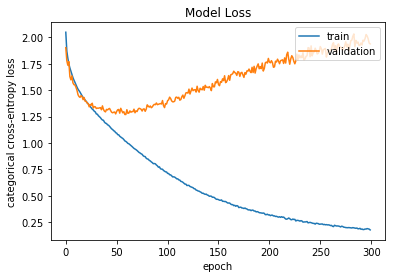

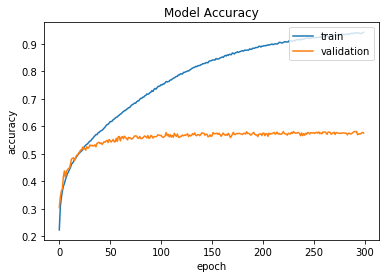

In [29]:
sgd2=optimizers.SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 

model13= Sequential()

model13= Sequential()
model13.add(Dense(3072, activation='relu',input_dim=3072))
model13.add(Dropout(0.3))
model13.add(Dense(1024, activation='relu'))
model13.add(Dropout(0.2))
model13.add(Dense(1024, activation='relu'))
model13.add(Dropout(0.2))
model13.add(Dense(1024, activation='relu'))
model13.add(Dropout(0.2))
model13.add(Dense(256, activation='relu'))
model13.add(Dropout(0.3))
model13.add(Dense(64,activation='relu'))
model13.add(Dropout(0.1))
model13.add(Dense(64,activation='relu'))
model13.add(Dense(10,activation='softmax'))

initial_time13= datetime.datetime.now()

model13.compile(loss='categorical_crossentropy',optimizer=sgd2,metrics=['accuracy'])

history13=model13.fit(x_trainvec,new_y_train_ohe, epochs=300,batch_size=64, validation_data=(x_testvec,new_y_test_ohe))

score13=model13.evaluate(x_testvec,new_y_test_ohe,batch_size=64)

finishing_time13= datetime.datetime.now()

training_time13= finishing_time13-initial_time13

print('Training:',training_time13)
print('Score:', score13)

plot_model_metrics(history13)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 186us/step - loss: 2.1098 - acc: 0.2004 - val_loss: 1.9364 - val_acc: 0.2569
Epoch 2/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.9177 - acc: 0.2860 - val_loss: 1.8105 - val_acc: 0.3426
Epoch 3/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.8483 - acc: 0.3213 - val_loss: 1.7858 - val_acc: 0.3600
Epoch 4/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.8017 - acc: 0.3446 - val_loss: 1.7145 - val_acc: 0.3800
Epoch 5/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.7623 - acc: 0.3583 - val_loss: 1.6724 - val_acc: 0.3947
Epoch 6/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.7268 - acc: 0.3735 - val_loss: 1.7431 - val_acc: 0.3716
Epoch 7/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.7004 - acc: 0.3841 - val_loss: 1.

50000/50000 [==============================] - 9s 171us/step - loss: 1.1376 - acc: 0.5974 - val_loss: 1.3006 - val_acc: 0.5452
Epoch 60/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.1288 - acc: 0.6019 - val_loss: 1.3302 - val_acc: 0.5336
Epoch 61/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.1261 - acc: 0.6024 - val_loss: 1.2815 - val_acc: 0.5488
Epoch 62/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.1180 - acc: 0.6051 - val_loss: 1.2894 - val_acc: 0.5551
Epoch 63/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.1086 - acc: 0.6089 - val_loss: 1.2968 - val_acc: 0.5413
Epoch 64/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.1006 - acc: 0.6111 - val_loss: 1.2772 - val_acc: 0.5478
Epoch 65/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.0943 - acc: 0.6140 - val_loss: 1.2755 - val_acc: 0.5502
Epoch 66/100
50000/50000 [=======

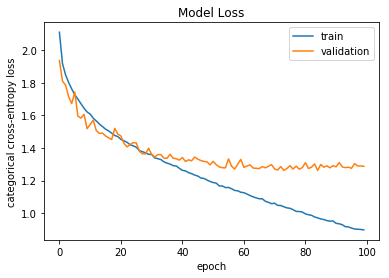

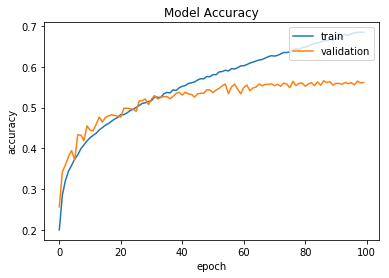

In [32]:
model14= Sequential()

model14= Sequential()
model14.add(Dense(3072, activation='relu',input_dim=3072,kernel_initializer='he_normal'))
model14.add(Dropout(0.3))
model14.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model14.add(Dropout(0.3))
#model14.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
#model14.add(Dropout(0.5))
#model14.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
#model14.add(Dropout(0.5))
model14.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model14.add(Dropout(0.3))
model14.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model14.add(Dropout(0.3))
model14.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model14.add(Dense(10,activation='softmax',kernel_initializer='he_normal'))

initial_time14= datetime.datetime.now()

model14.compile(loss='categorical_crossentropy',optimizer=sgd2,metrics=['accuracy'])

history14=model14.fit(x_trainvec,new_y_train_ohe, epochs=100,batch_size=64, validation_data=(x_testvec,new_y_test_ohe))

score14=model14.evaluate(x_testvec,new_y_test_ohe,batch_size=64)

finishing_time14= datetime.datetime.now()

training_time14= finishing_time14-initial_time14

print('Training:',training_time14)
print('Score:', score14)

plot_model_metrics(history14)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 16s 324us/step - loss: 2.0156 - acc: 0.2455 - val_loss: 1.8323 - val_acc: 0.3378
Epoch 2/100
50000/50000 [==============================] - 15s 303us/step - loss: 1.8535 - acc: 0.3248 - val_loss: 1.7526 - val_acc: 0.3775
Epoch 3/100
50000/50000 [==============================] - 15s 305us/step - loss: 1.7907 - acc: 0.3491 - val_loss: 1.7209 - val_acc: 0.3725
Epoch 4/100
50000/50000 [==============================] - 15s 305us/step - loss: 1.7484 - acc: 0.3666 - val_loss: 1.6745 - val_acc: 0.3931
Epoch 5/100
50000/50000 [==============================] - 15s 305us/step - loss: 1.7129 - acc: 0.3795 - val_loss: 1.6108 - val_acc: 0.4318
Epoch 6/100
50000/50000 [==============================] - 15s 305us/step - loss: 1.6813 - acc: 0.3920 - val_loss: 1.6238 - val_acc: 0.4354
Epoch 7/100
50000/50000 [==============================] - 15s 305us/step - loss: 1.6580 - acc: 0.4008 - val_l

Epoch 59/100
50000/50000 [==============================] - 15s 302us/step - loss: 1.1646 - acc: 0.5849 - val_loss: 1.2844 - val_acc: 0.5483
Epoch 60/100
50000/50000 [==============================] - 15s 305us/step - loss: 1.1489 - acc: 0.5876 - val_loss: 1.3020 - val_acc: 0.5434
Epoch 61/100
50000/50000 [==============================] - 15s 306us/step - loss: 1.1467 - acc: 0.5898 - val_loss: 1.2795 - val_acc: 0.5453
Epoch 62/100
50000/50000 [==============================] - 15s 306us/step - loss: 1.1487 - acc: 0.5889 - val_loss: 1.2796 - val_acc: 0.5482
Epoch 63/100
50000/50000 [==============================] - 15s 305us/step - loss: 1.1339 - acc: 0.5931 - val_loss: 1.2807 - val_acc: 0.5524
Epoch 64/100
50000/50000 [==============================] - 15s 305us/step - loss: 1.1260 - acc: 0.5952 - val_loss: 1.2999 - val_acc: 0.5443
Epoch 65/100
50000/50000 [==============================] - 15s 305us/step - loss: 1.1236 - acc: 0.5973 - val_loss: 1.2690 - val_acc: 0.5525
Epoch 66/100


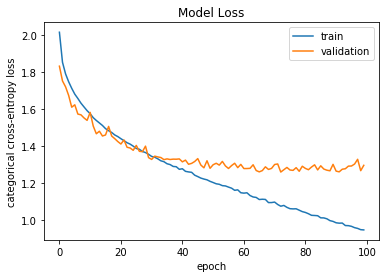

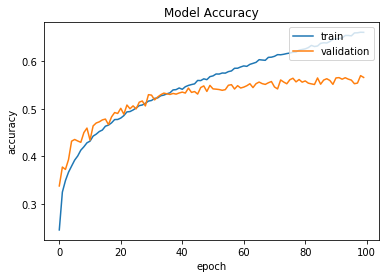

In [36]:
model15= Sequential()

model15= Sequential()
model15.add(Dense(3072, activation='relu',input_dim=3072,kernel_initializer='he_normal'))
model15.add(Dropout(0.4))
model15.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model15.add(Dropout(0.3))
model15.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model15.add(Dropout(0.3))
model15.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model15.add(Dense(10,activation='softmax',kernel_initializer='he_normal'))

initial_time15= datetime.datetime.now()

model15.compile(loss='categorical_crossentropy',optimizer=sgd2,metrics=['accuracy'])

history15=model15.fit(x_trainvec,new_y_train_ohe, epochs=100,batch_size=32, validation_data=(x_testvec,new_y_test_ohe))

score15=model15.evaluate(x_testvec,new_y_test_ohe,batch_size=32)

finishing_time15= datetime.datetime.now()

training_time15= finishing_time15-initial_time15

print('Training:',training_time15)
print('Score:', score15)

plot_model_metrics(history15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 23s 459us/step - loss: 2.1664 - acc: 0.1799 - val_loss: 1.9684 - val_acc: 0.2755
Epoch 2/100
50000/50000 [==============================] - 22s 436us/step - loss: 2.0022 - acc: 0.2441 - val_loss: 1.9590 - val_acc: 0.2975
Epoch 3/100
50000/50000 [==============================] - 22s 438us/step - loss: 1.9687 - acc: 0.2567 - val_loss: 1.8944 - val_acc: 0.3241
Epoch 4/100
50000/50000 [==============================] - 22s 439us/step - loss: 1.9488 - acc: 0.2718 - val_loss: 1.8816 - val_acc: 0.3343
Epoch 5/100
50000/50000 [==============================] - 22s 438us/step - loss: 1.9300 - acc: 0.2769 - val_loss: 1.8719 - val_acc: 0.3312
Epoch 6/100
50000/50000 [==============================] - 22s 438us/step - loss: 1.9171 - acc: 0.2844 - val_loss: 1.8709 - val_acc: 0.3410
Epoch 7/100
50000/50000 [==============================] - 22s 437us/step - loss: 1.9022 - acc: 0.2918 - val_l

Epoch 59/100
50000/50000 [==============================] - 22s 433us/step - loss: 1.6997 - acc: 0.3823 - val_loss: 1.6628 - val_acc: 0.4356
Epoch 60/100
50000/50000 [==============================] - 22s 432us/step - loss: 1.6833 - acc: 0.3914 - val_loss: 1.6747 - val_acc: 0.4262
Epoch 61/100
50000/50000 [==============================] - 22s 432us/step - loss: 1.6833 - acc: 0.3921 - val_loss: 1.6572 - val_acc: 0.4325
Epoch 62/100
50000/50000 [==============================] - 22s 433us/step - loss: 1.6783 - acc: 0.3927 - val_loss: 1.6537 - val_acc: 0.4316
Epoch 63/100
50000/50000 [==============================] - 22s 431us/step - loss: 1.6785 - acc: 0.3936 - val_loss: 1.6896 - val_acc: 0.4224
Epoch 64/100
50000/50000 [==============================] - 22s 433us/step - loss: 1.6742 - acc: 0.3924 - val_loss: 1.6778 - val_acc: 0.4186
Epoch 65/100
50000/50000 [==============================] - 22s 433us/step - loss: 1.6725 - acc: 0.3985 - val_loss: 1.6541 - val_acc: 0.4351
Epoch 66/100


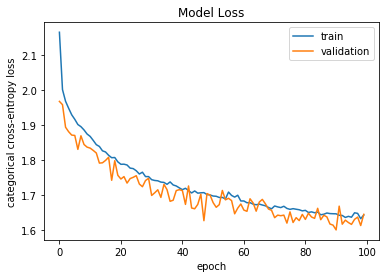

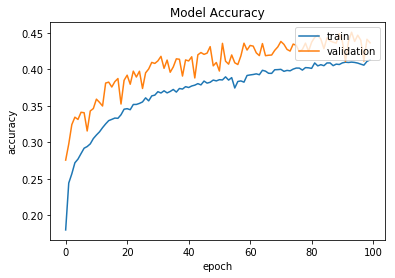

In [37]:
model15= Sequential()

model15= Sequential()
model15.add(Dense(3072, activation='relu',input_dim=3072,kernel_initializer='he_normal'))
model15.add(Dropout(0.4))
model15.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model15.add(Dropout(0.3))
model15.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model15.add(Dropout(0.3))
model15.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model15.add(Dense(10,activation='softmax',kernel_initializer='he_normal'))

initial_time15= datetime.datetime.now()

model15.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

history15=model15.fit(x_trainvec,new_y_train_ohe, epochs=100,batch_size=32, validation_data=(x_testvec,new_y_test_ohe))

score15=model15.evaluate(x_testvec,new_y_test_ohe,batch_size=32)

finishing_time15= datetime.datetime.now()

training_time15= finishing_time15-initial_time15

print('Training:',training_time15)
print('Score:', score15)

plot_model_metrics(history15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 18s 363us/step - loss: 2.2101 - acc: 0.1433 - val_loss: 2.0213 - val_acc: 0.2057
Epoch 2/500
50000/50000 [==============================] - 17s 340us/step - loss: 1.9880 - acc: 0.2341 - val_loss: 1.9099 - val_acc: 0.2488
Epoch 3/500
50000/50000 [==============================] - 17s 341us/step - loss: 1.9276 - acc: 0.2668 - val_loss: 1.8329 - val_acc: 0.3175
Epoch 4/500
50000/50000 [==============================] - 17s 341us/step - loss: 1.8791 - acc: 0.2996 - val_loss: 1.7959 - val_acc: 0.3386
Epoch 5/500
50000/50000 [==============================] - 17s 341us/step - loss: 1.8223 - acc: 0.3328 - val_loss: 1.7550 - val_acc: 0.3661
Epoch 6/500
50000/50000 [==============================] - 17s 340us/step - loss: 1.7777 - acc: 0.3522 - val_loss: 1.6830 - val_acc: 0.3877
Epoch 7/500
50000/50000 [==============================] - 17s 341us/step - loss: 1.7437 - acc: 0.3639 - val_l

Epoch 59/500
50000/50000 [==============================] - 17s 341us/step - loss: 1.2292 - acc: 0.5613 - val_loss: 1.3202 - val_acc: 0.5341
Epoch 60/500
50000/50000 [==============================] - 17s 340us/step - loss: 1.2217 - acc: 0.5665 - val_loss: 1.3248 - val_acc: 0.5380
Epoch 61/500
50000/50000 [==============================] - 17s 339us/step - loss: 1.2205 - acc: 0.5635 - val_loss: 1.3232 - val_acc: 0.5420
Epoch 62/500
50000/50000 [==============================] - 17s 342us/step - loss: 1.2106 - acc: 0.5695 - val_loss: 1.3388 - val_acc: 0.5279
Epoch 63/500
50000/50000 [==============================] - 17s 340us/step - loss: 1.2044 - acc: 0.5729 - val_loss: 1.3184 - val_acc: 0.5368
Epoch 64/500
50000/50000 [==============================] - 17s 342us/step - loss: 1.1957 - acc: 0.5766 - val_loss: 1.2910 - val_acc: 0.5451
Epoch 65/500
50000/50000 [==============================] - 17s 340us/step - loss: 1.1963 - acc: 0.5773 - val_loss: 1.2834 - val_acc: 0.5482
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.9408 - acc: 0.6673 - val_loss: 1.2895 - val_acc: 0.5641
Epoch 118/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.9416 - acc: 0.6680 - val_loss: 1.2820 - val_acc: 0.5634
Epoch 119/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.9383 - acc: 0.6710 - val_loss: 1.2895 - val_acc: 0.5620
Epoch 120/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.9302 - acc: 0.6704 - val_loss: 1.3002 - val_acc: 0.5605
Epoch 121/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.9290 - acc: 0.6723 - val_loss: 1.2899 - val_acc: 0.5627
Epoch 122/500
50000/50000 [==============================] - 17s 342us/step - loss: 0.9261 - acc: 0.6724 - val_loss: 1.2798 - val_acc: 0.5672
Epoch 123/500
50000/50000 [==============================] - 17s 339us/step - loss: 0.9144 - acc: 0.6767 - val_loss: 1.2812 - val_acc: 0.5659
Epoch 

Epoch 175/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.7232 - acc: 0.7466 - val_loss: 1.3489 - val_acc: 0.5725
Epoch 176/500
50000/50000 [==============================] - 17s 342us/step - loss: 0.7161 - acc: 0.7491 - val_loss: 1.3394 - val_acc: 0.5708
Epoch 177/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.7155 - acc: 0.7476 - val_loss: 1.3542 - val_acc: 0.5724
Epoch 178/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.7194 - acc: 0.7483 - val_loss: 1.3203 - val_acc: 0.5749
Epoch 179/500
50000/50000 [==============================] - 17s 338us/step - loss: 0.7117 - acc: 0.7497 - val_loss: 1.3549 - val_acc: 0.5712
Epoch 180/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.7151 - acc: 0.7506 - val_loss: 1.3381 - val_acc: 0.5708
Epoch 181/500
50000/50000 [==============================] - 17s 342us/step - loss: 0.7068 - acc: 0.7523 - val_loss: 1.3505 - val_acc: 0.5737
Epoch 

Epoch 233/500
50000/50000 [==============================] - 17s 342us/step - loss: 0.5553 - acc: 0.8072 - val_loss: 1.4323 - val_acc: 0.5783
Epoch 234/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.5593 - acc: 0.8054 - val_loss: 1.4213 - val_acc: 0.5736
Epoch 235/500
50000/50000 [==============================] - 17s 342us/step - loss: 0.5606 - acc: 0.8066 - val_loss: 1.4516 - val_acc: 0.5750
Epoch 236/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.5535 - acc: 0.8065 - val_loss: 1.4241 - val_acc: 0.5789
Epoch 237/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.5402 - acc: 0.8110 - val_loss: 1.4443 - val_acc: 0.5779
Epoch 238/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.5451 - acc: 0.8095 - val_loss: 1.4581 - val_acc: 0.5755
Epoch 239/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.5457 - acc: 0.8106 - val_loss: 1.4417 - val_acc: 0.5825
Epoch 

Epoch 291/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.4333 - acc: 0.8494 - val_loss: 1.5450 - val_acc: 0.5768
Epoch 292/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.4394 - acc: 0.8493 - val_loss: 1.5572 - val_acc: 0.5732
Epoch 293/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.4287 - acc: 0.8510 - val_loss: 1.5660 - val_acc: 0.5765
Epoch 294/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.4339 - acc: 0.8498 - val_loss: 1.5368 - val_acc: 0.5801
Epoch 295/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.4224 - acc: 0.8549 - val_loss: 1.5650 - val_acc: 0.5750
Epoch 296/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.4282 - acc: 0.8524 - val_loss: 1.5612 - val_acc: 0.5777
Epoch 297/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.4223 - acc: 0.8534 - val_loss: 1.5901 - val_acc: 0.5727
Epoch 

Epoch 349/500
50000/50000 [==============================] - 17s 342us/step - loss: 0.3465 - acc: 0.8780 - val_loss: 1.6289 - val_acc: 0.5819
Epoch 350/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.3436 - acc: 0.8822 - val_loss: 1.6666 - val_acc: 0.5802
Epoch 351/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.3455 - acc: 0.8834 - val_loss: 1.6554 - val_acc: 0.5762
Epoch 352/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.3415 - acc: 0.8833 - val_loss: 1.6503 - val_acc: 0.5772
Epoch 353/500
50000/50000 [==============================] - 17s 339us/step - loss: 0.3482 - acc: 0.8804 - val_loss: 1.6376 - val_acc: 0.5836
Epoch 354/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.3463 - acc: 0.8826 - val_loss: 1.6272 - val_acc: 0.5816
Epoch 355/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.3464 - acc: 0.8806 - val_loss: 1.6312 - val_acc: 0.5835
Epoch 

Epoch 407/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.2902 - acc: 0.9019 - val_loss: 1.6819 - val_acc: 0.5867
Epoch 408/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.2858 - acc: 0.9040 - val_loss: 1.6912 - val_acc: 0.5927
Epoch 409/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.2752 - acc: 0.9063 - val_loss: 1.7090 - val_acc: 0.5809
Epoch 410/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.2780 - acc: 0.9066 - val_loss: 1.7298 - val_acc: 0.5835
Epoch 411/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.2840 - acc: 0.9048 - val_loss: 1.7313 - val_acc: 0.5829
Epoch 412/500
50000/50000 [==============================] - 17s 342us/step - loss: 0.2803 - acc: 0.9044 - val_loss: 1.7017 - val_acc: 0.5839
Epoch 413/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.2774 - acc: 0.9056 - val_loss: 1.7131 - val_acc: 0.5901
Epoch 

Epoch 465/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.2407 - acc: 0.9205 - val_loss: 1.7812 - val_acc: 0.5834
Epoch 466/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.2379 - acc: 0.9182 - val_loss: 1.8042 - val_acc: 0.5807
Epoch 467/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.2359 - acc: 0.9199 - val_loss: 1.8311 - val_acc: 0.5838
Epoch 468/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.2360 - acc: 0.9204 - val_loss: 1.8016 - val_acc: 0.5821
Epoch 469/500
50000/50000 [==============================] - 17s 342us/step - loss: 0.2392 - acc: 0.9187 - val_loss: 1.8028 - val_acc: 0.5833
Epoch 470/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.2327 - acc: 0.9207 - val_loss: 1.7864 - val_acc: 0.5815
Epoch 471/500
50000/50000 [==============================] - 17s 341us/step - loss: 0.2351 - acc: 0.9197 - val_loss: 1.7899 - val_acc: 0.5794
Epoch 

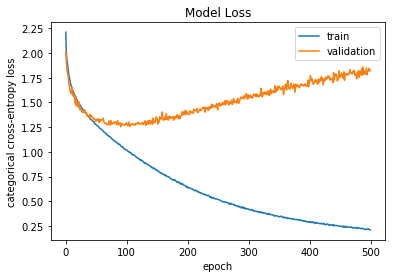

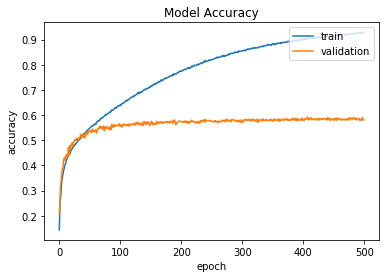

In [38]:
model16= Sequential()

model16= Sequential()
model16.add(Dense(3072, activation='relu',input_dim=3072,kernel_initializer='he_normal'))
model16.add(Dropout(0.4))
model16.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model16.add(Dropout(0.3))
model16.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model16.add(Dropout(0.3))
model16.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model16.add(Dropout(0.3))
model16.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model16.add(Dropout(0.3))
model16.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model16.add(Dense(10,activation='softmax',kernel_initializer='he_normal'))

initial_time16= datetime.datetime.now()

model16.compile(loss='categorical_crossentropy',optimizer=sgd2,metrics=['accuracy'])

history16=model16.fit(x_trainvec,new_y_train_ohe, epochs=500,batch_size=32, validation_data=(x_testvec,new_y_test_ohe))

score16=model16.evaluate(x_testvec,new_y_test_ohe,batch_size=32)

finishing_time16= datetime.datetime.now()

training_time16= finishing_time16-initial_time15

print('Training:',training_time16)
print('Score:', score16)

plot_model_metrics(history16)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 20s 394us/step - loss: 2.3185 - acc: 0.1040 - val_loss: 2.2884 - val_acc: 0.1342
Epoch 2/500
50000/50000 [==============================] - 18s 370us/step - loss: 2.1572 - acc: 0.1693 - val_loss: 2.0717 - val_acc: 0.1816
Epoch 3/500
50000/50000 [==============================] - 19s 370us/step - loss: 2.0703 - acc: 0.1831 - val_loss: 2.0642 - val_acc: 0.1797
Epoch 4/500
50000/50000 [==============================] - 18s 369us/step - loss: 2.0322 - acc: 0.1901 - val_loss: 2.0732 - val_acc: 0.1857
Epoch 5/500
50000/50000 [==============================] - 18s 369us/step - loss: 2.0081 - acc: 0.1954 - val_loss: 2.0436 - val_acc: 0.1798
Epoch 6/500
50000/50000 [==============================] - 19s 370us/step - loss: 1.9875 - acc: 0.2011 - val_loss: 1.9880 - val_acc: 0.2056
Epoch 7/500
50000/50000 [==============================] - 19s 370us/step - loss: 1.9740 - acc: 0.2063 - val_l

Epoch 59/500
50000/50000 [==============================] - 18s 368us/step - loss: 1.3346 - acc: 0.5263 - val_loss: 1.3519 - val_acc: 0.5239
Epoch 60/500
50000/50000 [==============================] - 19s 371us/step - loss: 1.3316 - acc: 0.5256 - val_loss: 1.3446 - val_acc: 0.5243
Epoch 61/500
50000/50000 [==============================] - 19s 371us/step - loss: 1.3291 - acc: 0.5286 - val_loss: 1.3706 - val_acc: 0.5206
Epoch 62/500
50000/50000 [==============================] - 19s 371us/step - loss: 1.3232 - acc: 0.5307 - val_loss: 1.3541 - val_acc: 0.5230
Epoch 63/500
50000/50000 [==============================] - 18s 369us/step - loss: 1.3105 - acc: 0.5332 - val_loss: 1.3586 - val_acc: 0.5249
Epoch 64/500
50000/50000 [==============================] - 18s 367us/step - loss: 1.3083 - acc: 0.5355 - val_loss: 1.3467 - val_acc: 0.5340
Epoch 65/500
50000/50000 [==============================] - 18s 368us/step - loss: 1.3009 - acc: 0.5366 - val_loss: 1.3473 - val_acc: 0.5354
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 18s 368us/step - loss: 1.0553 - acc: 0.6287 - val_loss: 1.3181 - val_acc: 0.5460
Epoch 118/500
50000/50000 [==============================] - 18s 370us/step - loss: 1.0588 - acc: 0.6267 - val_loss: 1.2759 - val_acc: 0.5554
Epoch 119/500
50000/50000 [==============================] - 18s 368us/step - loss: 1.0479 - acc: 0.6311 - val_loss: 1.3136 - val_acc: 0.5456
Epoch 120/500
50000/50000 [==============================] - 18s 369us/step - loss: 1.0399 - acc: 0.6373 - val_loss: 1.2922 - val_acc: 0.5579
Epoch 121/500
50000/50000 [==============================] - 18s 370us/step - loss: 1.0386 - acc: 0.6353 - val_loss: 1.3167 - val_acc: 0.5537
Epoch 122/500
50000/50000 [==============================] - 19s 370us/step - loss: 1.0448 - acc: 0.6329 - val_loss: 1.3115 - val_acc: 0.5500
Epoch 123/500
50000/50000 [==============================] - 18s 370us/step - loss: 1.0359 - acc: 0.6366 - val_loss: 1.2991 - val_acc: 0.5591
Epoch 

Epoch 175/500
50000/50000 [==============================] - 19s 372us/step - loss: 0.8384 - acc: 0.7080 - val_loss: 1.2975 - val_acc: 0.5727
Epoch 176/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.8336 - acc: 0.7085 - val_loss: 1.3020 - val_acc: 0.5721
Epoch 177/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.8325 - acc: 0.7089 - val_loss: 1.2970 - val_acc: 0.5688
Epoch 178/500
50000/50000 [==============================] - 19s 370us/step - loss: 0.8251 - acc: 0.7112 - val_loss: 1.3585 - val_acc: 0.5592
Epoch 179/500
50000/50000 [==============================] - 19s 371us/step - loss: 0.8287 - acc: 0.7111 - val_loss: 1.3294 - val_acc: 0.5677
Epoch 180/500
50000/50000 [==============================] - 18s 370us/step - loss: 0.8250 - acc: 0.7136 - val_loss: 1.3404 - val_acc: 0.5632
Epoch 181/500
50000/50000 [==============================] - 18s 368us/step - loss: 0.8219 - acc: 0.7147 - val_loss: 1.3016 - val_acc: 0.5717
Epoch 

Epoch 233/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.6512 - acc: 0.7741 - val_loss: 1.3835 - val_acc: 0.5774
Epoch 234/500
50000/50000 [==============================] - 19s 370us/step - loss: 0.6531 - acc: 0.7741 - val_loss: 1.3616 - val_acc: 0.5752
Epoch 235/500
50000/50000 [==============================] - 19s 373us/step - loss: 0.6527 - acc: 0.7743 - val_loss: 1.3977 - val_acc: 0.5685
Epoch 236/500
50000/50000 [==============================] - 18s 370us/step - loss: 0.6530 - acc: 0.7755 - val_loss: 1.3776 - val_acc: 0.5798
Epoch 237/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.6470 - acc: 0.7776 - val_loss: 1.3612 - val_acc: 0.5787
Epoch 238/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.6485 - acc: 0.7762 - val_loss: 1.3822 - val_acc: 0.5719
Epoch 239/500
50000/50000 [==============================] - 18s 368us/step - loss: 0.6433 - acc: 0.7775 - val_loss: 1.3860 - val_acc: 0.5725
Epoch 

Epoch 291/500
50000/50000 [==============================] - 18s 370us/step - loss: 0.5223 - acc: 0.8218 - val_loss: 1.4552 - val_acc: 0.5874
Epoch 292/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.5228 - acc: 0.8209 - val_loss: 1.4819 - val_acc: 0.5778
Epoch 293/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.5165 - acc: 0.8245 - val_loss: 1.4769 - val_acc: 0.5728
Epoch 294/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.5172 - acc: 0.8237 - val_loss: 1.4231 - val_acc: 0.5803
Epoch 295/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.5125 - acc: 0.8246 - val_loss: 1.4821 - val_acc: 0.5800
Epoch 296/500
50000/50000 [==============================] - 19s 371us/step - loss: 0.5221 - acc: 0.8227 - val_loss: 1.4256 - val_acc: 0.5819
Epoch 297/500
50000/50000 [==============================] - 18s 370us/step - loss: 0.5024 - acc: 0.8279 - val_loss: 1.4556 - val_acc: 0.5802
Epoch 

Epoch 349/500
50000/50000 [==============================] - 18s 368us/step - loss: 0.4208 - acc: 0.8589 - val_loss: 1.5073 - val_acc: 0.5795
Epoch 350/500
50000/50000 [==============================] - 18s 370us/step - loss: 0.4246 - acc: 0.8545 - val_loss: 1.5391 - val_acc: 0.5827
Epoch 351/500
50000/50000 [==============================] - 18s 370us/step - loss: 0.4173 - acc: 0.8590 - val_loss: 1.4953 - val_acc: 0.5872
Epoch 352/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.4123 - acc: 0.8612 - val_loss: 1.4883 - val_acc: 0.5884
Epoch 353/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.4175 - acc: 0.8584 - val_loss: 1.5230 - val_acc: 0.5866
Epoch 354/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.4158 - acc: 0.8588 - val_loss: 1.5524 - val_acc: 0.5853
Epoch 355/500
50000/50000 [==============================] - 19s 371us/step - loss: 0.4089 - acc: 0.8618 - val_loss: 1.5597 - val_acc: 0.5865
Epoch 

Epoch 407/500
50000/50000 [==============================] - 18s 368us/step - loss: 0.3475 - acc: 0.8830 - val_loss: 1.6108 - val_acc: 0.5852
Epoch 408/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.3482 - acc: 0.8801 - val_loss: 1.6122 - val_acc: 0.5842
Epoch 409/500
50000/50000 [==============================] - 19s 372us/step - loss: 0.3481 - acc: 0.8827 - val_loss: 1.5982 - val_acc: 0.5834
Epoch 410/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.3434 - acc: 0.8846 - val_loss: 1.5564 - val_acc: 0.5904
Epoch 411/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.3424 - acc: 0.8848 - val_loss: 1.5745 - val_acc: 0.5866
Epoch 412/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.3344 - acc: 0.8865 - val_loss: 1.6105 - val_acc: 0.5843
Epoch 413/500
50000/50000 [==============================] - 19s 370us/step - loss: 0.3441 - acc: 0.8838 - val_loss: 1.5997 - val_acc: 0.5878
Epoch 

Epoch 465/500
50000/50000 [==============================] - 19s 371us/step - loss: 0.2918 - acc: 0.9046 - val_loss: 1.6351 - val_acc: 0.5890
Epoch 466/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.2888 - acc: 0.9046 - val_loss: 1.6152 - val_acc: 0.5923
Epoch 467/500
50000/50000 [==============================] - 18s 370us/step - loss: 0.2843 - acc: 0.9045 - val_loss: 1.6798 - val_acc: 0.5882
Epoch 468/500
50000/50000 [==============================] - 18s 370us/step - loss: 0.2830 - acc: 0.9045 - val_loss: 1.6425 - val_acc: 0.5914
Epoch 469/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.2842 - acc: 0.9055 - val_loss: 1.6103 - val_acc: 0.5929
Epoch 470/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.2856 - acc: 0.9026 - val_loss: 1.6910 - val_acc: 0.5870
Epoch 471/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.2884 - acc: 0.9038 - val_loss: 1.6340 - val_acc: 0.5955
Epoch 

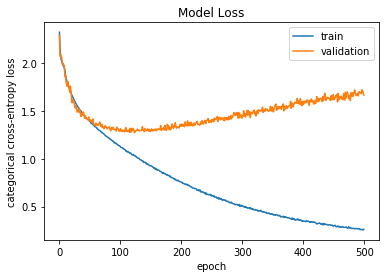

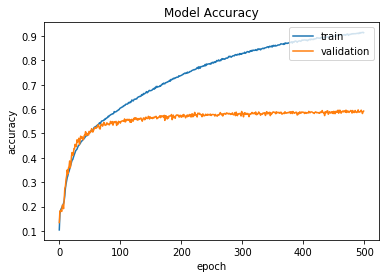

In [39]:
model17= Sequential()

model17= Sequential()
model17.add(Dense(3072, activation='relu',input_dim=3072,kernel_initializer='he_normal'))
model17.add(Dropout(0.4))
model17.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model17.add(Dropout(0.3))
model17.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model17.add(Dropout(0.3))
model17.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model17.add(Dropout(0.3))
model17.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model17.add(Dropout(0.3))
model17.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model17.add(Dropout(0.3))
model17.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model17.add(Dropout(0.3))
model17.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model17.add(Dense(10,activation='softmax',kernel_initializer='he_normal'))

initial_time17= datetime.datetime.now()

model17.compile(loss='categorical_crossentropy',optimizer=sgd2,metrics=['accuracy'])

history17=model17.fit(x_trainvec,new_y_train_ohe, epochs=500,batch_size=32, validation_data=(x_testvec,new_y_test_ohe))

score17=model17.evaluate(x_testvec,new_y_test_ohe,batch_size=32)

finishing_time17= datetime.datetime.now()

training_time17= finishing_time17-initial_time15

print('Training:',training_time17)
print('Score:', score17)

plot_model_metrics(history17)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 21s 421us/step - loss: 2.3176 - acc: 0.1104 - val_loss: 2.2645 - val_acc: 0.1595
Epoch 2/500
50000/50000 [==============================] - 20s 393us/step - loss: 2.1760 - acc: 0.1640 - val_loss: 2.1648 - val_acc: 0.1584
Epoch 3/500
50000/50000 [==============================] - 20s 393us/step - loss: 2.1002 - acc: 0.1787 - val_loss: 2.1618 - val_acc: 0.1489
Epoch 4/500
50000/50000 [==============================] - 20s 394us/step - loss: 2.0604 - acc: 0.1825 - val_loss: 2.1921 - val_acc: 0.1407
Epoch 5/500
50000/50000 [==============================] - 20s 391us/step - loss: 2.0344 - acc: 0.1851 - val_loss: 2.1937 - val_acc: 0.1312
Epoch 6/500
50000/50000 [==============================] - 20s 395us/step - loss: 2.0172 - acc: 0.1894 - val_loss: 2.1326 - val_acc: 0.1467
Epoch 7/500
50000/50000 [==============================] - 20s 392us/step - loss: 1.9975 - acc: 0.1976 - val_l

Epoch 59/500
50000/50000 [==============================] - 20s 390us/step - loss: 1.6255 - acc: 0.4012 - val_loss: 1.7016 - val_acc: 0.3884
Epoch 60/500
50000/50000 [==============================] - 20s 393us/step - loss: 1.6166 - acc: 0.4018 - val_loss: 1.6983 - val_acc: 0.3804
Epoch 61/500
50000/50000 [==============================] - 20s 392us/step - loss: 1.6063 - acc: 0.4068 - val_loss: 1.7187 - val_acc: 0.3770
Epoch 62/500
50000/50000 [==============================] - 20s 394us/step - loss: 1.5989 - acc: 0.4111 - val_loss: 1.7020 - val_acc: 0.3840
Epoch 63/500
50000/50000 [==============================] - 20s 394us/step - loss: 1.5906 - acc: 0.4138 - val_loss: 1.6590 - val_acc: 0.3867
Epoch 64/500
50000/50000 [==============================] - 20s 393us/step - loss: 1.5919 - acc: 0.4175 - val_loss: 1.6840 - val_acc: 0.3944
Epoch 65/500
50000/50000 [==============================] - 20s 390us/step - loss: 1.5792 - acc: 0.4223 - val_loss: 1.7280 - val_acc: 0.3796
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 20s 394us/step - loss: 1.3464 - acc: 0.5205 - val_loss: 1.5433 - val_acc: 0.4794
Epoch 118/500
50000/50000 [==============================] - 20s 393us/step - loss: 1.3530 - acc: 0.5153 - val_loss: 1.5070 - val_acc: 0.4827
Epoch 119/500
50000/50000 [==============================] - 20s 394us/step - loss: 1.3471 - acc: 0.5192 - val_loss: 1.4823 - val_acc: 0.4863
Epoch 120/500
50000/50000 [==============================] - 20s 395us/step - loss: 1.3359 - acc: 0.5218 - val_loss: 1.5453 - val_acc: 0.4774
Epoch 121/500
50000/50000 [==============================] - 20s 393us/step - loss: 1.3357 - acc: 0.5240 - val_loss: 1.4859 - val_acc: 0.4941
Epoch 122/500
50000/50000 [==============================] - 20s 396us/step - loss: 1.3263 - acc: 0.5251 - val_loss: 1.4735 - val_acc: 0.4933
Epoch 123/500
50000/50000 [==============================] - 20s 391us/step - loss: 1.3247 - acc: 0.5253 - val_loss: 1.4725 - val_acc: 0.4889
Epoch 

Epoch 175/500
50000/50000 [==============================] - 20s 394us/step - loss: 1.1606 - acc: 0.5948 - val_loss: 1.4659 - val_acc: 0.5096
Epoch 176/500
50000/50000 [==============================] - 20s 394us/step - loss: 1.1544 - acc: 0.5957 - val_loss: 1.4189 - val_acc: 0.5201
Epoch 177/500
50000/50000 [==============================] - 20s 392us/step - loss: 1.1475 - acc: 0.5953 - val_loss: 1.4154 - val_acc: 0.5216
Epoch 178/500
50000/50000 [==============================] - 20s 392us/step - loss: 1.1437 - acc: 0.5963 - val_loss: 1.4220 - val_acc: 0.5250
Epoch 179/500
50000/50000 [==============================] - 20s 391us/step - loss: 1.1394 - acc: 0.5977 - val_loss: 1.4689 - val_acc: 0.5046
Epoch 180/500
50000/50000 [==============================] - 20s 394us/step - loss: 1.1386 - acc: 0.6020 - val_loss: 1.4379 - val_acc: 0.5231
Epoch 181/500
50000/50000 [==============================] - 20s 393us/step - loss: 1.1523 - acc: 0.5941 - val_loss: 1.4539 - val_acc: 0.5109
Epoch 

Epoch 233/500
50000/50000 [==============================] - 20s 393us/step - loss: 0.9969 - acc: 0.6514 - val_loss: 1.4703 - val_acc: 0.5119
Epoch 234/500
50000/50000 [==============================] - 20s 394us/step - loss: 0.9922 - acc: 0.6542 - val_loss: 1.4017 - val_acc: 0.5442
Epoch 235/500
50000/50000 [==============================] - 20s 393us/step - loss: 0.9918 - acc: 0.6551 - val_loss: 1.4379 - val_acc: 0.5270
Epoch 236/500
50000/50000 [==============================] - 20s 393us/step - loss: 0.9898 - acc: 0.6547 - val_loss: 1.4559 - val_acc: 0.5250
Epoch 237/500
50000/50000 [==============================] - 20s 392us/step - loss: 0.9936 - acc: 0.6541 - val_loss: 1.4256 - val_acc: 0.5292
Epoch 238/500
50000/50000 [==============================] - 20s 394us/step - loss: 0.9917 - acc: 0.6567 - val_loss: 1.4313 - val_acc: 0.5315
Epoch 239/500
50000/50000 [==============================] - 20s 393us/step - loss: 0.9835 - acc: 0.6577 - val_loss: 1.4424 - val_acc: 0.5326
Epoch 

Epoch 291/500
50000/50000 [==============================] - 20s 394us/step - loss: 0.8758 - acc: 0.6979 - val_loss: 1.4331 - val_acc: 0.5413
Epoch 292/500
50000/50000 [==============================] - 20s 393us/step - loss: 0.8688 - acc: 0.7026 - val_loss: 1.3760 - val_acc: 0.5434
Epoch 293/500
50000/50000 [==============================] - 20s 394us/step - loss: 0.8592 - acc: 0.7037 - val_loss: 1.3993 - val_acc: 0.5487
Epoch 294/500
50000/50000 [==============================] - 20s 393us/step - loss: 0.8610 - acc: 0.7033 - val_loss: 1.4160 - val_acc: 0.5409
Epoch 295/500
50000/50000 [==============================] - 20s 392us/step - loss: 0.8574 - acc: 0.7045 - val_loss: 1.4248 - val_acc: 0.5445
Epoch 296/500
50000/50000 [==============================] - 20s 393us/step - loss: 0.8620 - acc: 0.7042 - val_loss: 1.4414 - val_acc: 0.5370
Epoch 297/500
50000/50000 [==============================] - 20s 392us/step - loss: 0.8486 - acc: 0.7099 - val_loss: 1.4607 - val_acc: 0.5401
Epoch 

Epoch 349/500
50000/50000 [==============================] - 20s 394us/step - loss: 0.7537 - acc: 0.7455 - val_loss: 1.4490 - val_acc: 0.5494
Epoch 350/500
50000/50000 [==============================] - 20s 394us/step - loss: 0.7599 - acc: 0.7413 - val_loss: 1.4493 - val_acc: 0.5425
Epoch 351/500
50000/50000 [==============================] - 20s 391us/step - loss: 0.7678 - acc: 0.7419 - val_loss: 1.4547 - val_acc: 0.5359
Epoch 352/500
50000/50000 [==============================] - 20s 392us/step - loss: 0.7631 - acc: 0.7404 - val_loss: 1.4058 - val_acc: 0.5508
Epoch 353/500
50000/50000 [==============================] - 20s 393us/step - loss: 0.7626 - acc: 0.7419 - val_loss: 1.4783 - val_acc: 0.5361
Epoch 354/500
50000/50000 [==============================] - 20s 393us/step - loss: 0.7553 - acc: 0.7451 - val_loss: 1.4239 - val_acc: 0.5492
Epoch 355/500
50000/50000 [==============================] - 20s 394us/step - loss: 0.7496 - acc: 0.7466 - val_loss: 1.4484 - val_acc: 0.5497
Epoch 

Epoch 407/500
50000/50000 [==============================] - 20s 394us/step - loss: 0.6536 - acc: 0.7823 - val_loss: 1.4116 - val_acc: 0.5624
Epoch 408/500
50000/50000 [==============================] - 20s 393us/step - loss: 0.6648 - acc: 0.7779 - val_loss: 1.4691 - val_acc: 0.5483
Epoch 409/500
50000/50000 [==============================] - 20s 392us/step - loss: 0.6610 - acc: 0.7790 - val_loss: 1.4364 - val_acc: 0.5624
Epoch 410/500
50000/50000 [==============================] - 20s 391us/step - loss: 0.6643 - acc: 0.7795 - val_loss: 1.4238 - val_acc: 0.5606
Epoch 411/500
50000/50000 [==============================] - 20s 393us/step - loss: 0.6560 - acc: 0.7801 - val_loss: 1.4879 - val_acc: 0.5473
Epoch 412/500
50000/50000 [==============================] - 20s 393us/step - loss: 0.6626 - acc: 0.7797 - val_loss: 1.4564 - val_acc: 0.5558
Epoch 413/500
50000/50000 [==============================] - 20s 395us/step - loss: 0.6609 - acc: 0.7800 - val_loss: 1.4361 - val_acc: 0.5585
Epoch 

Epoch 465/500
50000/50000 [==============================] - 20s 393us/step - loss: 0.5866 - acc: 0.8048 - val_loss: 1.4879 - val_acc: 0.5509
Epoch 466/500
50000/50000 [==============================] - 20s 392us/step - loss: 0.5884 - acc: 0.8074 - val_loss: 1.4390 - val_acc: 0.5655
Epoch 467/500
50000/50000 [==============================] - 20s 392us/step - loss: 0.5857 - acc: 0.8086 - val_loss: 1.4650 - val_acc: 0.5525
Epoch 468/500
50000/50000 [==============================] - 20s 394us/step - loss: 0.5833 - acc: 0.8080 - val_loss: 1.4427 - val_acc: 0.5637
Epoch 469/500
50000/50000 [==============================] - 20s 392us/step - loss: 0.5700 - acc: 0.8147 - val_loss: 1.4634 - val_acc: 0.5623
Epoch 470/500
50000/50000 [==============================] - 20s 390us/step - loss: 0.5811 - acc: 0.8096 - val_loss: 1.4953 - val_acc: 0.5511
Epoch 471/500
50000/50000 [==============================] - 20s 396us/step - loss: 0.5828 - acc: 0.8103 - val_loss: 1.4324 - val_acc: 0.5636
Epoch 

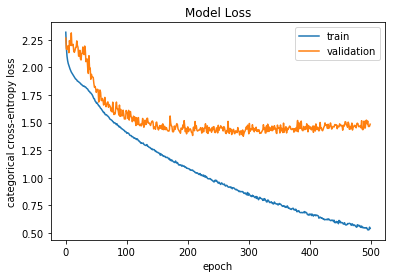

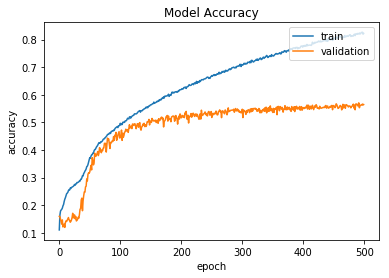

In [40]:
model18= Sequential()

model18= Sequential()
model18.add(Dense(3072, activation='relu',input_dim=3072,kernel_initializer='he_normal'))
model18.add(Dropout(0.4))
model18.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model18.add(Dropout(0.3))
model18.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model18.add(Dropout(0.3))
model18.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model18.add(Dropout(0.3))
model18.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model18.add(Dropout(0.3))
model18.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model18.add(Dropout(0.3))
model18.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model18.add(Dropout(0.3))
model18.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
model18.add(Dropout(0.3))
model18.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
model18.add(Dropout(0.3))
model18.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model18.add(Dense(10,activation='softmax',kernel_initializer='he_normal'))

initial_time18= datetime.datetime.now()

model18.compile(loss='categorical_crossentropy',optimizer=sgd2,metrics=['accuracy'])

history18=model18.fit(x_trainvec,new_y_train_ohe, epochs=500,batch_size=32, validation_data=(x_testvec,new_y_test_ohe))

score18=model18.evaluate(x_testvec,new_y_test_ohe,batch_size=32)

finishing_time18= datetime.datetime.now()

training_time18= finishing_time17-initial_time15

print('Training:',training_time18)
print('Score:', score18)

plot_model_metrics(history18)

## Convolutional Neural Networks